In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import re
from scipy.sparse import hstack

from sklearn.metrics import precision_score #precision
from sklearn.metrics import recall_score  #recall
from sklearn.metrics import auc  #area under curve
from sklearn.metrics import roc_auc_score  
from sklearn.metrics import log_loss  #log loss
from sklearn.metrics import f1_score  #f1 score

from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_curve #plot roc curve
from sklearn.metrics import precision_recall_curve  # plot precision recall

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)


# Reading, descriptive statistics, Cleaning Column header

In [176]:
df=pd.read_csv('wine.csv')
df_extra = df

In [177]:
df.shape

(6497, 13)

In [178]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Type', 'quality'],
      dtype='object')

In [179]:
# cleaning the column header
df.columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type', 'quality']

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6491 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6494 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6482 non-null   float64
 10  alcohol               6487 non-null   float64
 11  type                  6497 non-null   object 
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [181]:
df.isnull().sum()

fixed_acidity            0
volatile_acidity         0
citric_acid              0
residual_sugar           0
chlorides                0
free_sulfur_dioxide      6
total_sulfur_dioxide     0
density                  3
pH                       0
sulphates               15
alcohol                 10
type                     0
quality                  0
dtype: int64

In [182]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type,quality
0,7.39926,0.96490,0.00000,2.20011,0.08800,16.00080,31.99840,0.99746,3.58018,0.66993,10.20102,White,5
1,12.29877,0.38996,0.63003,2.30012,0.09100,6.00030,17.99910,1.00030,3.16016,0.48995,9.50095,White,5
2,6.39936,0.26997,0.49002,7.30036,0.04600,53.00265,205.98970,0.99550,3.24016,0.42996,9.20092,Red,6
3,7.39926,0.18998,0.30002,12.80064,0.05300,48.50243,228.98855,0.99850,3.14016,0.48995,9.10091,Red,7
4,6.19938,0.33997,0.30002,11.10055,0.04700,28.00140,236.98815,0.99800,3.18016,0.48995,8.70087,Red,5


In [183]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.00000,6497.00000,6497.00000,6497.00000,6497.00000,6491.00000,6497.00000,6494.00000,6497.00000,6482.00000,6487.00000,6497.00000
mean,7.21459,0.33963,0.31865,5.44351,0.05603,30.53580,115.73894,0.99460,3.21866,0.53140,10.49439,5.81838
std,1.29630,0.16462,0.14533,4.75804,0.03503,17.75604,56.51892,0.00300,0.16080,0.14891,1.19310,0.87326
min,3.79962,0.07999,0.00000,0.60003,0.00900,1.00005,5.99970,0.98701,2.72014,0.21998,8.00080,3.00000
25%,6.39936,0.22998,0.25001,1.80009,0.03800,17.00085,76.99615,0.99224,3.11016,0.42996,9.50095,5.00000
50%,6.99930,0.28997,0.31002,3.00015,0.04700,29.00145,117.99410,0.99479,3.21016,0.50995,10.30103,6.00000
75%,7.69923,0.39996,0.39002,8.10041,0.06500,41.00205,155.99220,0.99689,3.32017,0.59994,11.30113,6.00000
max,15.89841,1.57984,1.66008,65.80329,0.61097,289.01445,439.97800,1.03888,4.01020,1.99980,14.90149,9.00000


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6491 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6494 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6482 non-null   float64
 10  alcohol               6487 non-null   float64
 11  type                  6497 non-null   object 
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [11]:
df.type.value_counts()

Red      4898
White    1599
Name: type, dtype: int64

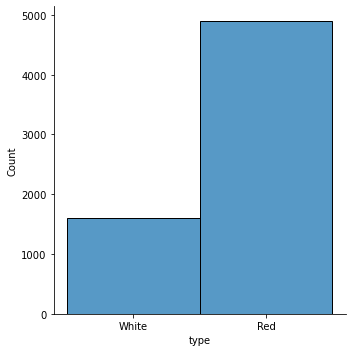

In [12]:
# distribution of type of wine
sns.displot(df, x='type')
plt.show()

# Scatter Plots

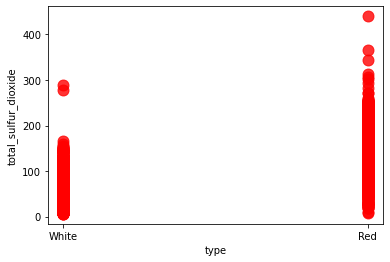

In [17]:
plt.scatter(
    x=df_extra.type ,
    y=df_extra.total_sulfur_dioxide ,
    c='red',
    alpha=0.8,s=120)
plt.xlabel("type")
plt.ylabel("total_sulfur_dioxide")
plt.show()

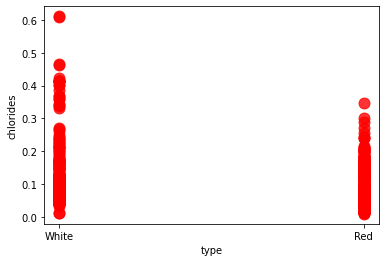

In [18]:
plt.scatter(
    x=df_extra.type ,
    y=df_extra.chlorides ,
    c='red',
    alpha=0.8,s=120)
plt.xlabel("type")
plt.ylabel("chlorides")
plt.show()

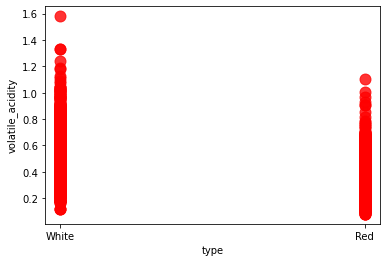

In [19]:
plt.scatter(
    x=df_extra.type ,
    y=df_extra.volatile_acidity ,
    c='red',
    alpha=0.8,s=120)
plt.xlabel("type")
plt.ylabel("volatile_acidity")
plt.show()

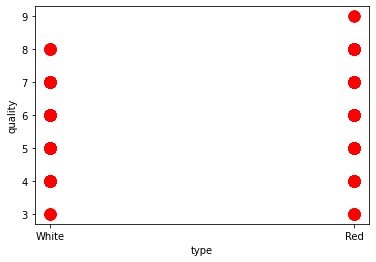

In [20]:
plt.scatter(
    x=df_extra.type ,
    y=df_extra.quality ,
    c='red',
    alpha=0.8,s=120)
plt.xlabel("type")
plt.ylabel("quality")
plt.show()

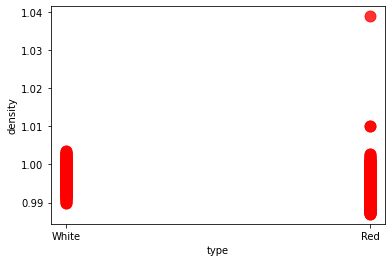

In [21]:
plt.scatter(
    x=df_extra.type ,
    y=df_extra.density ,
    c='red',
    alpha=0.8,s=120)
plt.xlabel("type")
plt.ylabel("density")
plt.show()

# Converting Categorical feature in to binary

In [23]:
df.type=np.where(df.type=='Red',1, 0)  

# Creating New Feature¶

In [25]:
df['molecular_sulfur_dioxide']=df['free_sulfur_dioxide'] / (1 + np.power(10, df['pH'] - 1.81))

In [26]:
df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type,quality,molecular_sulfur_dioxide
0,7.39926,0.96490,0.00000,2.20011,0.08800,16.00080,31.99840,0.99746,3.58018,0.66993,10.20102,0,5,0.26709
1,12.29877,0.38996,0.63003,2.30012,0.09100,6.00030,17.99910,1.00030,3.16016,0.48995,9.50095,0,5,0.25647
2,6.39936,0.26997,0.49002,7.30036,0.04600,53.00265,205.98970,0.99550,3.24016,0.42996,9.20092,1,6,1.89801
3,7.39926,0.18998,0.30002,12.80064,0.05300,48.50243,228.98855,0.99850,3.14016,0.48995,9.10091,1,7,2.16651
4,6.19938,0.33997,0.30002,11.10055,0.04700,28.00140,236.98815,0.99800,3.18016,0.48995,8.70087,1,5,1.14521


# Density Plots

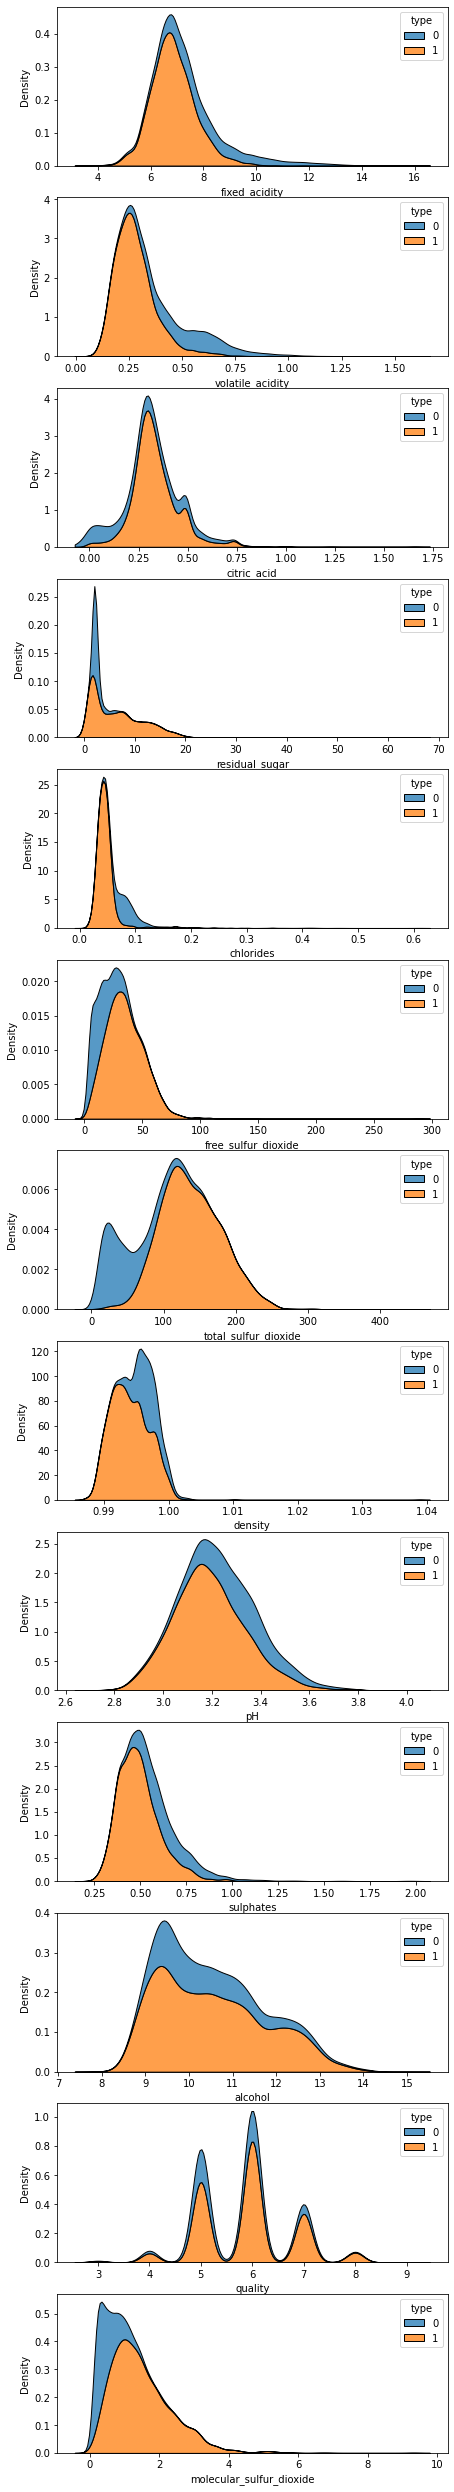

In [29]:
plot_list=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality','molecular_sulfur_dioxide']
count=1
plt.subplots(figsize=(7, 45))
for x in plot_list:
    plt.subplot(13,1,count)
    sns.kdeplot(data=df, x=x, hue='type', multiple="stack")
    count+=1

# Outlier removal and missing value imputation

In [30]:
#creating df_num, df_cat and df_bin. Creating 3 list for each type dataframe(columns lists)
df_int= df.select_dtypes(include=[np.int32, np.int64])
df_cont=df.select_dtypes(include=[np.float64,np.float32])
df_cat=df.select_dtypes(exclude='number')
bin_columns = [col for col in df if 
               df[col].dropna().value_counts().index.isin([0,1]).all()]

if len(bin_columns)!=0:
    df_bin= pd.DataFrame(df_int, columns=bin_columns)
else:
    df_bin=pd.DataFrame()

bin_columns= list(df_bin.columns)
cat_columns= list(df_cat.columns)
int_columns= list(df_int.columns)
cont_columns=list(df_cont.columns)
for element in bin_columns:
    if element in int_columns:
        int_columns.remove(element)
df_int=  pd.DataFrame(df_int, columns=int_columns)# removing bin_class columns


print(df_int.shape)
print(df_cont.shape)
print(df_bin.shape)
print(df_cat.shape)

print(int_columns)
print(cont_columns)
print(bin_columns)
print(cat_columns)

# sometimes the int and cont columns not get correctly classified, eg- gears, so after this step - we can manually change the list of columns. 

(6497, 1)
(6497, 12)
(6497, 1)
(6497, 0)
['quality']
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'molecular_sulfur_dioxide']
['type']
[]


In [31]:
columns_for_outliers=['fixed_acidity','volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol','molecular_sulfur_dioxide']

In [32]:
# Detecting outliers and imputing nan 
from scipy.stats import skew

for x in columns_for_outliers:
    skewness= skew(df[x], axis=0, bias=True, nan_policy='omit')
    if (skewness>=-0.5) and (skewness<=0.5):
        upper = df[x].mean() + 3*df[x].std()
        lower = df[x].mean() -3*df[x].std()
        for y in df[x]:
            if (y>upper) or (y<lower):
                df[x].loc[df[x] == y]=None
    else:
        percentile25 = df[x].quantile(0.25)
        percentile75 = df[x].quantile(0.75)
        iqr= percentile75-percentile25
        upper = percentile75 + 1.5 * iqr
        lower = percentile25 - 1.5 * iqr
        for y in df[x]:
            if (y>upper) or (y<lower):
                df[x].loc[df[x] == y]=None
    
    
       

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  il

In [33]:
df.isnull().sum()

fixed_acidity               357
volatile_acidity            387
citric_acid                  28
residual_sugar              118
chlorides                   286
free_sulfur_dioxide          68
total_sulfur_dioxide          8
density                       6
pH                           33
sulphates                   206
alcohol                      13
type                          0
quality                       0
molecular_sulfur_dioxide    144
dtype: int64

In [34]:
df.isnull().sum().sum()  # outliers nan + prev nan

1654

In [208]:
# missing value imputation and creating missing value indicator 
#for x in df.columns:
    
  #  if (df[x].isnull().values.any()):
    #    df[x+'_indicator']= np.where(np.isnan(df[x]),1,0)
   #     if (x in num_columns) and (x!='Mfg_Month') and (x!='Mfg_Year'):
    #        df[x]=np.where(np.isnan(df[x]), df[x].median(), df[x]) 
    #    else:
  #          df[x]=np.where(np.isnan(df[x]), df[x].mode(), df[x]) 
   #     value = df[x+'_indicator']
    #    df = df.drop(columns=[x+'_indicator'])
     #   index= df.columns.get_loc(x)+1
    #    df.insert(loc=index, column=x+'_indicator', value=value)
        
        
        

In [35]:
from sklearn.impute import KNNImputer   # missing values imputation

imputer = KNNImputer(n_neighbors=2)  #impute missing values
df.iloc[:,1:]=imputer.fit_transform(df.iloc[:,1:]) #replace df with imputed missing values

In [36]:
df.isnull().sum()  # outliers nan + prev nan

fixed_acidity               357
volatile_acidity              0
citric_acid                   0
residual_sugar                0
chlorides                     0
free_sulfur_dioxide           0
total_sulfur_dioxide          0
density                       0
pH                            0
sulphates                     0
alcohol                       0
type                          0
quality                       0
molecular_sulfur_dioxide      0
dtype: int64

In [37]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Init
ii_imp = IterativeImputer(
    estimator=ExtraTreesRegressor(), max_iter=10, random_state=1121218
)

# Tranform
df.loc[:, :] = ii_imp.fit_transform(df)

In [211]:
#df=df.dropna()

In [38]:
df.isnull().sum().sum()

0

In [39]:
df.shape

(6497, 14)

In [40]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type,quality,molecular_sulfur_dioxide
0,7.39926,0.53495,0.00000,2.20011,0.08800,16.00080,31.99840,0.99746,3.58018,0.66993,10.20102,0.00000,5.00000,0.26709
1,9.11509,0.38996,0.63003,2.30012,0.09100,6.00030,17.99910,1.00030,3.16016,0.48995,9.50095,0.00000,5.00000,0.25647
2,6.39936,0.26997,0.49002,7.30036,0.04600,53.00265,205.98970,0.99550,3.24016,0.42996,9.20092,1.00000,6.00000,1.89801
3,7.39926,0.18998,0.30002,12.80064,0.05300,48.50243,228.98855,0.99850,3.14016,0.48995,9.10091,1.00000,7.00000,2.16651
4,6.19938,0.33997,0.30002,11.10055,0.04700,28.00140,236.98815,0.99800,3.18016,0.48995,8.70087,1.00000,5.00000,1.14521


In [41]:
#df.drop(['quality',], axis=1, inplace=True)
#df.drop(['sulphates',], axis=1, inplace=True)

# Train-Test split

In [42]:
y = df.type # this df will be  a result of concat df_num and  df_cat (both have no outliers no ,missing vale)

In [43]:
x= df.drop('type', axis=1)

In [44]:
print(x.shape)
print(y.shape)

(6497, 13)
(6497,)


In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,stratify=y ,random_state=123)

In [46]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4872, 13)
(4872,)
(1625, 13)
(1625,)


In [47]:
X_train.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'molecular_sulfur_dioxide'],
      dtype='object')

# Binary and discrete Data Preparation

In [48]:
#class_columns=['fixed_acidity_indicator', 'volatile_acidity_indicator', 'citric_acid_indicator', 'residual_sugar_indicator', 'chlorides_indicator', 'free_sulfur_dioxide_indicator', 'total_sulfur_dioxide_indicator', 'density_indicator', 'pH_indicator', 'sulphates_indicator', 'alcohol_indicator', 'type']

In [49]:
class_columns=['quality']

In [50]:
from scipy.sparse import coo_matrix

X_train_class_processed = coo_matrix((4872, 0))
X_test_class_processed = coo_matrix((1625, 0))

In [51]:
from scipy.sparse import hstack

for x in class_columns:
    

    s_train = (X_train[x].values.reshape(-1, 1))

    s_test = (X_test[x].values.reshape(-1, 1))

    
    X_train_class_processed= hstack((X_train_class_processed,s_train)).tocsr()
    X_test_class_processed= hstack((X_test_class_processed,s_test)).tocsr()


In [52]:
print(X_train_class_processed.shape)
print(X_test_class_processed.shape)

(4872, 1)
(1625, 1)


In [53]:
num_columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'molecular_sulfur_dioxide']

In [54]:
from scipy.sparse import coo_matrix

X_train_num_processed = coo_matrix((4872, 0))
X_test_num_processed = coo_matrix((1625, 0))

In [55]:
#vectorize all numerical feature
for x in num_columns:
    from sklearn.preprocessing import StandardScaler

    stand_scalar = StandardScaler()
    stand_scalar.fit(X_train[x].values.reshape(-1,1)) # finding the mean and standard deviation of this data
    print(f"Mean : {stand_scalar.mean_[0]}, Standard deviation : {np.sqrt(stand_scalar.var_[0])}")

    # Now standardize the data with above mean and variance.
    scaled_train = stand_scalar.transform(X_train[x].values.reshape(-1, 1))

    scaled_test = stand_scalar.transform(X_test[x].values.reshape(-1, 1))

    
    X_train_num_processed= hstack((X_train_num_processed,scaled_train)).tocsr()
    X_test_num_processed= hstack((X_test_num_processed,scaled_test)).tocsr()


Mean : 7.097433590147783, Standard deviation : 0.981912216565643
Mean : 0.3180926912972086, Standard deviation : 0.1247427182945859
Mean : 0.31512681619458127, Standard deviation : 0.14072670072759316
Mean : 5.186835701252053, Standard deviation : 4.333434490945551
Mean : 0.05129949743431855, Standard deviation : 0.018490523738840976
Mean : 30.016279064039413, Standard deviation : 16.410158709512157
Mean : 115.30088491379311, Standard deviation : 56.48890080671185
Mean : 0.9945639206691298, Standard deviation : 0.0029343254425278015
Mean : 3.2177237036124797, Standard deviation : 0.1554372721238823
Mean : 0.5194154177955665, Standard deviation : 0.12014805512797261
Mean : 10.50672585591133, Standard deviation : 1.195352853581634
Mean : 1.2009257009099163, Standard deviation : 0.7885130754389458


In [56]:
print(X_train_num_processed.shape)
print(X_test_num_processed.shape)

(4872, 12)
(1625, 12)


# Classification 

In [57]:
X_train_processed = hstack((X_train_num_processed,X_train_class_processed)).tocsr()
X_test_processed = hstack(( X_test_num_processed,X_test_class_processed)).tocsr()

In [175]:
X_train_processed.shape

(4872, 13)

# Random Forest¶

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight

classifier = RandomForestClassifier()
classifier.fit(X_train_processed, Y_train)

RandomForestClassifier()

In [60]:
Y_pred = classifier.predict(X_test_processed)

In [61]:
data = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
data

,Actual,Predicted
162,1.00000,1.00000
4128,0.00000,0.00000
4572,1.00000,1.00000
5595,0.00000,0.00000
1569,0.00000,0.00000
4408,1.00000,1.00000
2386,1.00000,1.00000
3395,1.00000,1.00000
2043,1.00000,1.00000
6165,1.00000,1.00000


In [62]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_pred)

0.992

In [68]:
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, Y_pred)
auc(test_fpr, test_tpr)


0.9871173469387755

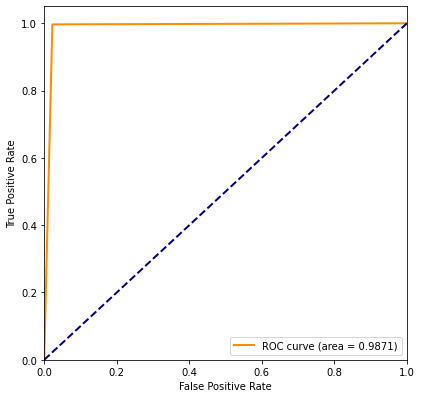

In [69]:
fpr, tpr, _ = roc_curve(data.Actual, data.Predicted)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=[6.5, 6.5])
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()

In [ ]:
df_new = df
df_new.drop(['type'], axis=1, inplace=True)

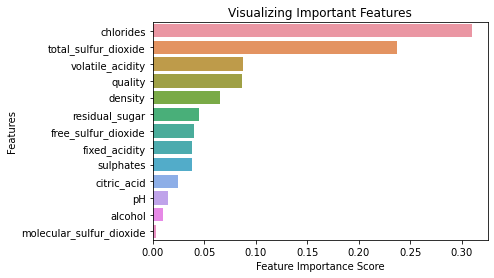

In [64]:
importance = classifier.feature_importances_
feature_imp = pd.Series(importance, index=df.columns).sort_values(ascending=False)
feature_imp

# Visualize the Importance Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

In [67]:
a=np.where(data.Actual!=data.Predicted, data.index,None)
a=list(a)
a= filter(None, a)
a=list(a)
df_wrong= df_extra.iloc[a]
len(a)
# total misclassified points

13

# Confusion Matrix

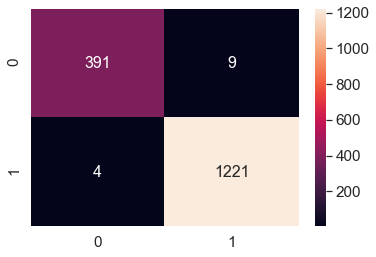

In [71]:
cm = pd.DataFrame(confusion_matrix(data['Actual'],data['Predicted']))

sns.set(font_scale=1.4)#for label size
sns.heatmap(cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.show()
# actual on y axis, predicted on x axis

# Calculate- TP, FP, FN,TN

In [72]:
true_positive=cm[1][1]
print("true positive: "+str(true_positive))

false_positive=cm[1][0]
print('false positive: '+str(false_positive))

false_negative=cm[0][1]
print('false negative: '+str(false_negative))

true_negative=cm[0][0]
print('true negative: '+str(true_negative))

true positive: 1221
false positive: 9
false negative: 4
true negative: 391


In [73]:

# In this I am considering Positive class as 1.So all calculations performed by keeping this assumption in mind.
def perf_measure(Y_test, Y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(Y_pred)): 
        if Y_test[i]==Y_pred[i]==1:
            TP += 1
        if Y_pred[i]==1 and Y_test[i]!=Y_pred[i]:
            FP += 1
        if Y_test[i]==Y_pred[i]==0:
            TN += 1
        if Y_pred[i]==0 and Y_test[i]!=Y_pred[i]:
            FN += 1
    return(TP, FP, TN, FN)

In [74]:
TP ,FP, TN, FN = perf_measure(list(data['Actual']), list(data['Predicted']))
print("TP:",TP ,"  FP:",FP,"  FN:",FN, "  TN:", TN)

TP: 1221   FP: 9   FN: 4   TN: 391


# Classification Report

In [75]:
from sklearn.metrics import classification_report 
print ('Report : ')
print (classification_report(Y_test,Y_pred) )

Report : 
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       400
         1.0       0.99      1.00      0.99      1225

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



# Calculate- Precison, Recall, Specificity,negative predictive value,false positive rate

In [76]:
#precision / positive predictive value
print(precision_score(data['Actual'],data['Predicted']))
print(true_positive / (true_positive + false_positive))


0.9926829268292683
0.9926829268292683


In [77]:
#recall / sensitivity / True Positive Rate / Hit Rate
print(recall_score(data['Actual'],data['Predicted']))

print(true_positive / (true_positive + false_negative))

0.996734693877551
0.996734693877551


In [78]:
#specificity / True Negative Rate / Selectivity
specificity=true_negative / (true_negative + false_positive)
specificity

0.9775

In [79]:
#negative predictive value
negative_predictive_value=true_negative / (true_negative + false_negative)
negative_predictive_value

0.9898734177215189

In [80]:
#false positive rate / Fall Out
print(1-specificity)
print(false_positive/(false_positive + true_negative ))

0.022499999999999964
0.0225


# KNN

In [128]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train_processed, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [129]:
Y_pred = classifier.predict(X_test_processed)

In [130]:
data = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})


In [131]:
accuracy_score(Y_test, Y_pred)

0.9889230769230769

In [132]:
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, Y_pred)
auc(test_fpr, test_tpr)


0.9817091836734694

In [133]:
a=np.where(data.Actual!=data.Predicted, data.index,None)
a=list(a)
a= filter(None, a)
a=list(a)
df_wrong= df_extra.iloc[a]
len(a)
# total misclassified points

18

# Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_processed, Y_train)

LogisticRegression()

In [135]:
Y_pred = classifier.predict(X_test_processed)

In [136]:
data = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})



In [137]:
accuracy_score(Y_test, Y_pred)

0.9876923076923076

In [138]:
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, Y_pred)
auc(test_fpr, test_tpr)


0.9808928571428571

In [139]:
a=np.where(data.Actual!=data.Predicted, data.index,None)
a=list(a)
a= filter(None, a)
a=list(a)
df_wrong= df_extra.iloc[a]
len(a)
# total misclassified points

20

# XGBOOST

In [160]:
import xgboost as xgb
from scipy import stats
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

clf = xgb.XGBClassifier(num_class = 2,objective = 'multi:softprob',eval_metric = "logloss")
n_iter_search=100
param_dist = {
            
           "learning_rate" : stats.uniform(0.0001,0.1),
            "colsample_bytree" : stats.uniform(0,1),
             "min_child_weight" : stats.uniform(0.0001,10),
              "gamma": stats.uniform(0.001,10),
                "n_estimators" : sp_randint(10,200),
                "max_depth":[3,4]
             }
rs=RandomizedSearchCV( clf , param_distributions=param_dist,  n_iter=n_iter_search, cv=5,  n_jobs=3 , scoring = 'neg_log_loss')
rs.fit(X_train_processed,Y_train)


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=...
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019835CC8880>,
                                        'learning_rate':

In [161]:
Y_pred= rs.predict_proba(X_test_processed)

In [162]:
Y_pred = Y_pred[:,1]

In [163]:
Y_pred = np.where(Y_pred>0.5,1.0, 0.0)

In [164]:
Y_pred.reshape(1625,)

array([1., 0., 1., ..., 0., 0., 0.])

In [165]:
data = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred.reshape(1625,)})
data

,Actual,Predicted
162,1.00000,1.00000
4128,0.00000,0.00000
4572,1.00000,1.00000
5595,0.00000,0.00000
1569,0.00000,0.00000
4408,1.00000,1.00000
2386,1.00000,1.00000
3395,1.00000,1.00000
2043,1.00000,1.00000
6165,1.00000,1.00000


In [166]:
accuracy_score(Y_test, Y_pred)

0.9913846153846154

In [167]:
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, Y_pred)
auc(test_fpr, test_tpr)


0.9850255102040817

In [168]:
a=np.where(data.Actual!=data.Predicted, data.index,None)
a=list(a)
a= filter(None, a)
a=list(a)
df_wrong= df_extra.iloc[a]
len(a)
# total misclassified points

14

# Neural Networks

In [151]:
import tensorflow
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
import tensorflow.keras.metrics
from tensorflow.keras.optimizers import Adam
# load the dataset

n_features = X_train_processed.shape[1]
print(n_features)
# define model
model = Sequential()

model.add(Dense(2,input_shape=(n_features,)))

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
# compile the model
#opt = Adam(learning_rate=0.004)
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['AUC'])
model.summary()



13
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                700       
_________________________________________________________________
dense_6 (Dense)              (None, 20)                1020      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_8 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 2,171
Trainable params: 2,171
Non-trainable params: 0
_________________________________________________

In [152]:
# fit the model
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',patience=2)
history =model.fit(X_train_processed.todense(), Y_train,epochs=20,batch_size=36,validation_split=0.20)

Epoch 1/20
109/109 [==============================] - 1s 5ms/step - loss: 0.2423 - auc: 0.9675 - val_loss: 0.0410 - val_auc: 0.9920
Epoch 2/20
109/109 [==============================] - 0s 2ms/step - loss: 0.0635 - auc: 0.9952 - val_loss: 0.0310 - val_auc: 0.9982
Epoch 3/20
109/109 [==============================] - 0s 2ms/step - loss: 0.0483 - auc: 0.9961 - val_loss: 0.0290 - val_auc: 0.9964
Epoch 4/20
109/109 [==============================] - 0s 3ms/step - loss: 0.0399 - auc: 0.9959 - val_loss: 0.0246 - val_auc: 0.9985
Epoch 5/20
109/109 [==============================] - 0s 3ms/step - loss: 0.0385 - auc: 0.9961 - val_loss: 0.0249 - val_auc: 0.9968
Epoch 6/20
109/109 [==============================] - 0s 2ms/step - loss: 0.0350 - auc: 0.9964 - val_loss: 0.0279 - val_auc: 0.9963
Epoch 7/20
109/109 [==============================] - 0s 3ms/step - loss: 0.0345 - auc: 0.9967 - val_loss: 0.0272 - val_auc: 0.9967
Epoch 8/20
109/109 [==============================] - 0s 2ms/step - loss: 0.

In [153]:
Y_pred= model.predict(X_test_processed)


In [154]:
Y_pred = np.where(Y_pred>0.5,1.0, 0.0)

In [155]:
Y_pred.reshape(1625,)

array([1., 0., 1., ..., 0., 0., 0.])

In [156]:
data = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred.reshape(1625,)})
data

,Actual,Predicted
162,1.00000,1.00000
4128,0.00000,0.00000
4572,1.00000,1.00000
5595,0.00000,0.00000
1569,0.00000,0.00000
4408,1.00000,1.00000
2386,1.00000,1.00000
3395,1.00000,1.00000
2043,1.00000,1.00000
6165,1.00000,1.00000


In [157]:
accuracy_score(Y_test, Y_pred)

0.9889230769230769

In [158]:
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, Y_pred)
auc(test_fpr, test_tpr)


0.984234693877551

In [159]:
a=np.where(data.Actual!=data.Predicted, data.index,None)
a=list(a)
a= filter(None, a)
a=list(a)
df_wrong= df_extra.iloc[a]
len(a)
# total misclassified points

18

# RANDOM FOREST GIVING HIGHEST AUC 